In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sms-call-internet1.csv')

In [3]:
df.describe()


,CellID,countrycode,smsin,smsout,callin,callout,internet
count,1.828063e+06,1.828063e+06,782927.000000,455865.000000,465697.000000,842316.000000,766015.000000
mean,5.272951e+03,3.468055e+02,5.592043,6.102760,4.907212,3.332250,109.017650
std,2.720244e+03,4.278563e+03,14.853994,16.035943,14.285091,12.485792,349.105808
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.134000e+03,3.300000e+01,0.122900,0.114300,0.072100,0.059100,0.062300
50%,5.376000e+03,4.100000e+01,0.707200,0.733800,0.350300,0.222600,0.255900
75%,7.491000e+03,8.600000e+01,4.298500,4.712100,2.843800,1.079000,53.095000
max,1.000000e+04,9.725900e+04,691.773600,691.834500,700.822100,744.953800,23753.163800


In [4]:
df.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-03 00:00:00,1,0,0.2221,NaN,NaN,0.0534,NaN
1,2013-11-03 00:00:00,1,39,0.9891,0.8306,0.2481,0.5635,54.5778
2,2013-11-03 00:00:00,2,0,0.2223,NaN,NaN,0.0547,NaN
3,2013-11-03 00:00:00,2,39,0.9946,0.8315,0.2476,0.5748,54.7746
4,2013-11-03 00:00:00,3,0,0.2225,NaN,NaN,0.0560,NaN


<Axes: >

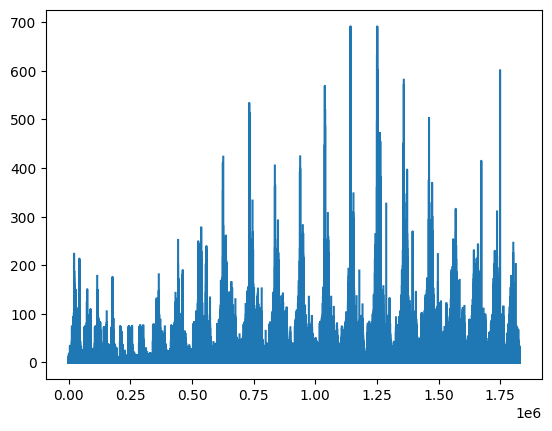

In [5]:
df['smsin'].plot()


In [6]:
plt.show()

<Axes: xlabel='callin', ylabel='callout'>

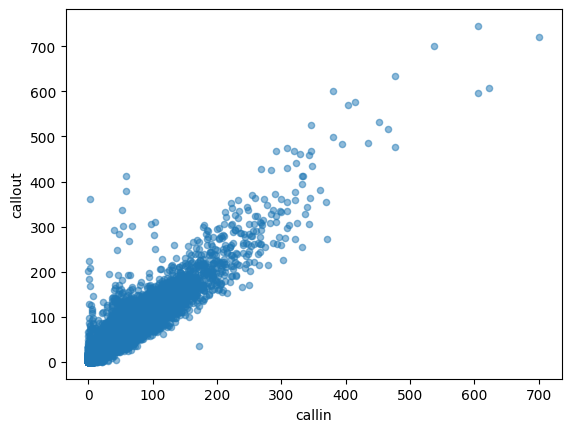

In [7]:
df.plot.scatter(x = 'callin', y= 'callout', alpha=0.5)

In [8]:
df['internet'].mean()

109.01765005528613

In [9]:
df['CellID'].value_counts()


CellID
6165    832
6064    831
5160    757
6065    752
5161    750
       ... 
2357     41
2358     41
2259     41
2258     41
2559     41
Name: count, Length: 10000, dtype: int64

In [10]:
df.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-03 00:00:00,1,0,0.2221,NaN,NaN,0.0534,NaN
1,2013-11-03 00:00:00,1,39,0.9891,0.8306,0.2481,0.5635,54.5778
2,2013-11-03 00:00:00,2,0,0.2223,NaN,NaN,0.0547,NaN
3,2013-11-03 00:00:00,2,39,0.9946,0.8315,0.2476,0.5748,54.7746
4,2013-11-03 00:00:00,3,0,0.2225,NaN,NaN,0.0560,NaN


More interesting examples: Now lets try to plot the number of SMS in and SMS out messages over each hour of the day to identify peak usage times.

In [11]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [12]:
df['hour'] = df['datetime'].dt.hour

In [13]:
sms_in_hourly = df.groupby('hour')['smsin'].sum()
sms_out_hourly = df.groupby('hour')['smsout'].sum()

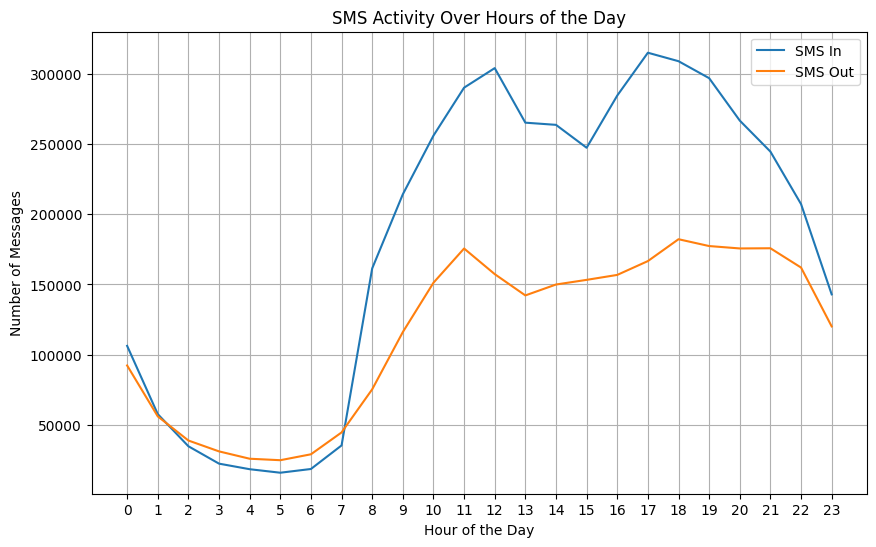

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(sms_in_hourly.index, sms_in_hourly.values, label='SMS In')
plt.plot(sms_out_hourly.index, sms_out_hourly.values, label='SMS Out')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.title('SMS Activity Over Hours of the Day')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()
